# A4_Recommendations

This workbook **creates** and **test** the model. 

This entails the following steps:

| No.     | Step                                          |
| :-------| :---------------------------------------------|
| A4.1    | Import Libraries                              |
| A4.2    | Load Images                                   |
| A4.3    | Load Model                                    |
| A4.4    | Load Different Dataset                        |
| A4.5    | Recommendations                               |

## A4.1 Import Libraries

In [2]:
#Import libraries
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2lab, deltaE_cie76
import cv2
from collections import Counter
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers
import h5py

## A4.2 Load Images

In [ ]:
#Load images
data_dir = '../deepfashionextract3/img/'
categories = ['top', 'skirt', 'dress']

data = []

def create_data():
    
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)

        for filename in os.listdir(path):
            #Load image
            img_data = os.path.join(path, filename)
            image = cv2.imread(img_data)
            
            try:
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                #Minimize to approx. one third
                image = cv2.resize(image, (96,96))
                image = np.array(image, dtype=np.float32)
                
                data.append([image, label])
            
            except Exception as e:
                pass
            
    print(len(data))
    
    #wb for write and binary
    pick = open('a_data.pickle', 'wb')
    pickle.dump(data, pick)
    pick.close()

In [ ]:
create_data()

In [ ]:
def load_data():
    #rb for read and binary
    pick = open('a_data.pickle', 'rb')
    data = pickle.load(pick)
    pick.close()
    
    #Shuffle the data
    np.random.shuffle(data)
    
    feature = []
    labels = []
    
    for img, label in data:
        feature.append(img)
        labels.append(label)
        
    feature = np.array(feature, dtype=np.float32 )
    labels = np.array(labels)
        
    ##Normalize the pixels between 0 and 1
    feature = feature/255.0
    
    return [feature, labels]

In [ ]:
load_data()

## A4.3 Load Model

Since we do not have a large dataset only **10%** is saved for **test** so that more data can be used for training. 

In [ ]:
#Create model - 1 
model = tf.keras.Model(input_layer, out)

In [ ]:
#Create model - 2
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit model 
history = model.fit(X_train, y_train, batch_size=20, epochs=15)
history

The following shows a summary of the **hyperparameters**.

In [ ]:
model.summary()

In [ ]:
#Save model
from keras.models import load_model
model.save('A_recognition.h5')

## A4.4 Load Different Dataset

A **new test set** is loaded to simulate a customer searching for a similar product, or a cross sale. 

In [57]:
#Load new test set
style_data2 = pd.read_csv('style_data2.csv', index_col=0).reset_index(drop=True)
style_data2.head()

,id,cat
0,49653,Top
1,58513,Top
2,39716,Dress
3,28456,Skirt
4,31782,Top


**2,026** images of tops, skirts and dresses are available.

In [59]:
len(style_data2['id'])

2026

It is **simulated** that the customer is interested in a **random item.

In [145]:
#Based on minimum and maximum a random number is defined
item_index = random.randint(0, 18632)
item_index

2769

In [146]:
img_no = style_data.iloc[item_index, 0]
img_no

50205

Below the **selected image** is shown.

In [1]:
%matplotlib inline 
root_fashion = '../fashion_dataset2/images/'

image_name = str(img_no) + '.jpg'
image_name2 = os.path.join(root_fashion, image_name)
img = cv2.imread(image_name2,3) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (96,96))
img = np.array(img, dtype=np.float32)
img = img/255

#prediction = model.predict(img)

plt.imshow(img)

#np.argmax returns the position of the largest value
#plt.xlabel('Actual:'+categories[y_test[i]]+'\n'+'Predicted:'+categories[np.argmax(y_pred[i])])
plt.xticks([])

plt.show();

NameError: name 'img_no' is not defined

In [44]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [45]:
def get_colors(image, number_of_colors):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    return rgb_colors

In [46]:
rgb = get_colors(img, 2)
rgb

NameError: name 'img' is not defined

The dataframes with tops, skirts and dresses of the **DeepFashion** dataset are loaded for making **cross-selling offer**.

In [60]:
#Load data with tops
deepfashion_tops = pd.read_csv('../deepfashionextract3/deepfashion_tops.csv', index_col=0).reset_index(drop=True)
deepfashion_tops.head()

,category,selected_style,image_name
0,top,Beaded,../deepfashionextract3/img/top/Beaded_Chiffon_...
1,top,Beaded,../deepfashionextract3/img/top/Beaded_Chiffon_...
2,top,Beaded,../deepfashionextract3/img/top/Beaded_Chiffon_...
3,top,Beaded,../deepfashionextract3/img/top/Beaded_Chiffon_...
4,top,Beaded,../deepfashionextract3/img/top/Beaded_Chiffon_...


In [61]:
#Load data with tops
deepfashion_skirts = pd.read_csv('../deepfashionextract3/deepfashion_skirts.csv', index_col=0).reset_index(drop=True)

4000

In [62]:
#Load data with dresses
deepfashion_dresses = pd.read_csv('../deepfashionextract3/deepfashion_dresses.csv', index_col=0).reset_index(drop=True)
deepfashion_dresses.head()

,category,selected_style,image_name
0,dress,Embroidered,../deepfashionextract3/img/dress/Embroidered_B...
1,dress,Embroidered,../deepfashionextract3/img/dress/Embroidered_B...
2,dress,Embroidered,../deepfashionextract3/img/dress/Embroidered_B...
3,dress,Embroidered,../deepfashionextract3/img/dress/Embroidered_B...
4,dress,Embroidered,../deepfashionextract3/img/dress/Embroidered_B...


According to the prediction **three cross-selling offers** are made according to the following rules:

1. If a top is predicted, a matching skirt is recommended.
2. If a skirt is predicted, a matching top is recommended.
3. If a dress is predicted, another dress is recommended.

These suggestions are based on the assumptions that top and skirt can be **worn together**, while a person who is interested in a dress would also like to buy **other** dresses. 

In [63]:
#Simulate prediction
prediction = random.randint(0, 2)
prediction

0

In [64]:
categories = ['top', 'skirt', 'dress']
path_top = '../deepfashionextract3/img/top/'
path_skirt = '../deepfashionextract3/img/skirt/'
path_dress = '../deepfashionextract3/img/dress/'

def offer(prediction):
    '''This function suggests a suitable category for a cross-selling offer.''' 
    #Prediction that it is a top
    if prediction == 0: 
        #Recommend three skirts
        ident = []
        for i in range(3):
            output = deepfashion_skirts.iloc[random.randint(0, 4000), 2]  
            last_part = output[-16:]
            middle = output.replace('../deepfashionextract3/img/skirt/','').replace(output[-16:],'')
            ident.append('../deepfashionextract3/img/skirt/' + middle[:-1] + '_' + last_part)
    #Prediction that it is a skirt
    elif prediction == 1: 
        #Recommend three tops
        indent = []
        for i in range(3):
            output = deepfashion_tops.iloc[random.randint(0, 4000), 2]
            last_part = output[-16:]
            middle = output.replace('../deepfashionextract3/img/top/','').replace(output[-16:],'')
            ident.append('../deepfashionextract3/img/top/' + middle[:-1] + '_' + last_part)
    #Prediction that it is a dress  
    elif prediction == 2:  
        #Recommend three dress
        ident = []
        for i in range(3):
            output = deepfashion_dresses.iloc[random.randint(0, 4000), 2]   
            last_part = output[-16:]
            middle = output.replace('../deepfashionextract3/img/dress/','').replace(output[-16:],'')
            ident.append('../deepfashionextract3/img/dress/' + middle[:-1] + '_' + last_part)
    return ident

In [65]:
#Save into variable
cross = offer(prediction)
cross

['../deepfashionextract3/img/skirt/Buttoned_Daisy_Print_Skirt_img_00000037.jpg',
 '../deepfashionextract3/img/skirt/Pleated_Chiffon_Skirt_img_00000066.jpg',
 '../deepfashionextract3/img/skirt/Classic_Fold-Over_Maxi_Skirt_img_00000064.jpg']

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


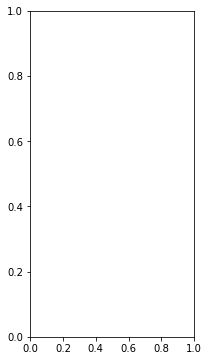

In [78]:
#Show images
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,3,1)
ident1 = cv2.imread(cross[0], 3)
ident1 = cv2.cvtColor(ident1, cv2.COLOR_BGR2RGB)
ident1 = cv2.resize(ident1, (224,224))
ident1 = np.array(ident1, dtype=np.float32)/255
ax1.imshow(ident1);

ax2 = fig.add_subplot(1,3,2)
ident2 = cv2.imread(cross[1], 3)
ident2 = cv2.cvtColor(ident2, cv2.COLOR_BGR2RGB)
ident2 = cv2.resize(ident2, (224,224))
ident2 = np.array(ident2, dtype=np.float32)/255
ax2.imshow(ident2);

ax3 = fig.add_subplot(1,3,3)
ident3 = cv2.imread(cross[2], 3)
ident3 = cv2.cvtColor(ident3, cv2.COLOR_BGR2RGB)
ident3 = cv2.resize(ident3, (224,224))
ident3 = np.array(ident3, dtype=np.float32)/255
ax3.imshow(ident3);
plt.show();

TypeError: Image data of dtype object cannot be converted to float

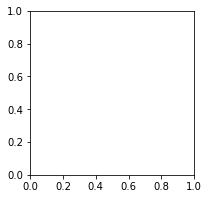

In [83]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,3,1)
ident1 = cv2.imread(cross[0], 3)
ax1.imshow(ident1);

ax2 = fig.add_subplot(1,3,2)
ident2 = cv2.imread(cross[1], 3)
ident2 = np.array(ident2, dtype=np.float32)/255
ident2 = cv2.resize(ident2, (224,224))
ax2.imshow(ident2);

ax3 = fig.add_subplot(1,3,3)
ident3 = cv2.imread(cross[2], 3)
ident3 = np.array(ident3, dtype=np.float32)/255
ident3 = cv2.resize(ident3, (224,224))
ax3.imshow(ident3);

In [84]:
cv2.imread(cross[1])

In [87]:
cv2.imshow(cross[1], 3)
plt.show()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


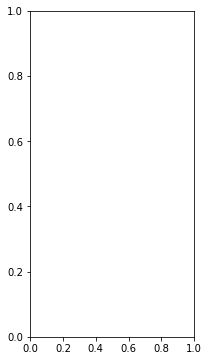

In [27]:
show_offer(cross)

In [100]:
#Three most dominant colors
get_colors(ident1, 3, False)

[array([0.9056341, 0.8824864, 0.8896816], dtype=float32),
 array([0.3078322 , 0.24160016, 0.24811277], dtype=float32),
 array([0.71542  , 0.6242447, 0.6146033], dtype=float32)]

In [101]:
#Three most dominant colors
get_colors(ident2, 3, False)

[array([0.909032 , 0.9040282, 0.9044175], dtype=float32),
 array([0.3175158 , 0.25622487, 0.22858292], dtype=float32),
 array([0.67892617, 0.62859154, 0.59411407], dtype=float32)]

In [103]:
#Three most dominant colors
get_colors(ident3, 3, False)

[array([0.7896715 , 0.73356646, 0.6935267 ], dtype=float32),
 array([0.94685644, 0.9443524 , 0.9458392 ], dtype=float32),
 array([0.45818788, 0.31204343, 0.240165  ], dtype=float32)]

In [135]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

In [136]:
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

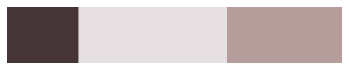

In [137]:
#Color of option1
img = cv2.imread(ident1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
#Color of option2
img = cv2.imread(ident2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
#Color of option3
img = cv2.imread(ident3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()